In [1]:
"""
Name: example.ipynb
Authors: Stephan Meighen-Berger
Example for the package
"""

'\nName: example.ipynb\nAuthors: Stephan Meighen-Berger\nExample for the package\n'

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd

In [3]:
# Adding path to module
sys.path.append("../")

In [4]:
# picture path
PICS = '../pics/'

In [5]:
# Module imports
from fourth_day import Fourth_Day, config

In [6]:
# Some example settings
# Scenario
config['scenario']['population size'] = 1000
config['scenario']['encounters'] = True
config['scenario']['exclusion'] = False
config['scenario']['injection']['rate'] = 0
config['scenario']['duration'] = 200
config['organisms']['emission fraction'] = 0.5
# Geometry
config['geometry']['volume'] = {
    'function': 'rectangle',
    'x_length': 1.,
    'y_length': 1.
}
# Water
config['water']['model']['name'] = 'None'
config['water']['model']['time step'] = 1

In [7]:
# Creating a fourth_day object
fd = Fourth_Day()

In [8]:
# Launching solver
fd.sim()

In [9]:
fd.statistics[-1]

,species,pos_x,pos_y,velocity,angle,radius,energy,observed,max_emission,emission fraction,regeneration,is_emitting,emission_duration,encounter photons,shear photons,photons
0,Paraphyllina ransoni Russell,0.504200,0.682592,0.004095,2.276321,0.001058,1.000,True,27.505491,0.5,0.001,False,-200.0,0.0,0.0,0.0
1,Aeginura grimaldii Maas,0.073576,0.346541,0.006571,0.853769,0.000768,0.667,True,8.393156,0.5,0.001,False,-164.0,0.0,0.0,0.0
2,Praya dubia (Quoy and Gaimard),-0.000131,0.601635,0.003609,3.733922,0.000792,1.000,False,8.974659,0.5,0.001,False,-186.0,0.0,0.0,0.0
3,Nectopyramis natans (Bigelow),1.002806,0.400019,0.006736,0.320624,0.000959,1.000,False,9.558992,0.5,0.001,False,-26.0,0.0,0.0,0.0
4,Periphyllopsis braueri Vanhoeffen,0.420817,0.771277,0.007800,1.550676,0.001093,1.000,True,10.711722,0.5,0.001,False,-200.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Atolla vanhoeffeni Russell,0.107583,0.849261,0.001638,3.792259,0.001257,0.145,True,8.381190,0.5,0.001,False,-139.0,0.0,0.0,0.0
996,Apolemia sp. 1,0.608606,0.713752,0.001873,5.520643,0.000895,1.000,True,18.688134,0.5,0.001,False,-200.0,0.0,0.0,0.0
997,Mertensiidae gen. nov. A sp. nov. Ba,0.367054,0.722986,0.001017,5.896128,0.001430,1.000,True,18.456172,0.5,0.001,False,-200.0,0.0,0.0,0.0
998,Bathocyroe fosteri Harbison,0.082159,0.095684,0.004901,3.818984,0.001228,1.000,True,12.265497,0.5,0.001,False,-200.0,0.0,0.0,0.0


In [10]:
# Plotting standards
std_size = 10.
fontsize = 20.
lw=3.
h_length=1.5

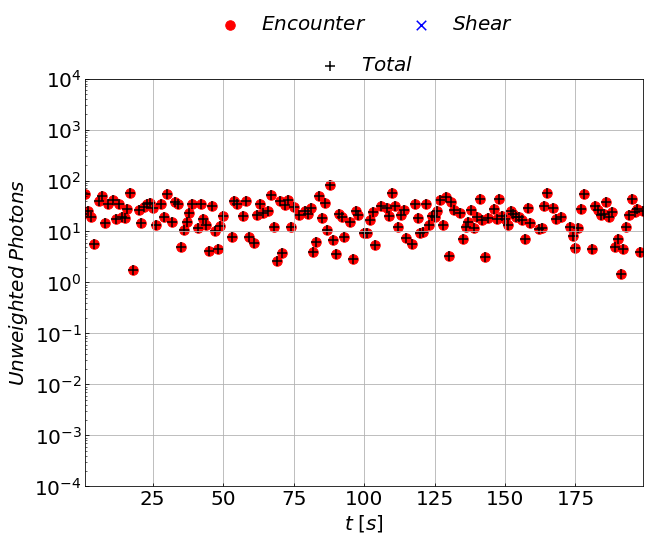

In [11]:
# Energy distributions
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
data_enc = np.array([np.sum(fd.statistics[i].loc[:, 'encounter photons'].values)
                     for i in range(len(fd.t))])
data_shear = np.array([np.sum(fd.statistics[i].loc[:, 'shear photons'].values)
                       for i in range(len(fd.t))])
data = np.array([np.sum(fd.statistics[i].loc[:, 'photons'].values)
                     for i in range(len(fd.t))])
ax1.scatter(fd.t,
            data_enc,
            s=lw*30, color='r', label=r'$Encounter$', marker="o")
ax1.scatter(fd.t,
            data_shear,
            s=lw*30, color='b', label=r'$Shear$', marker="x")
ax1.scatter(fd.t,
            data,
            s=lw*30, color='k', label=r'$Total$', marker="+")
ax1.set_xlim(1e0, max(fd.t))
ax1.set_ylim(1e-4, 1e4)
ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlabel(r'$t\;[s]$', fontsize=fontsize)
ax1.set_ylabel(r'$Unweighted\;Photons$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.grid(True)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h[:2],l[:2], loc=9, bbox_to_anchor=(0.5, +1.2),
                  ncol=2, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
lgd2 = ax1.legend(h[2:],l[2:], loc=9, bbox_to_anchor=(0.5, +1.1),
                  ncol=2, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
plt.show()

In [12]:
figure.savefig(PICS + "MC_Example.png",
               bbox_inches='tight')